In [2]:
from sklearn.datasets import load_iris #從 sklearn dataset下載Iris的資料集
import pandas as pd #建表格套件


iris= load_iris() #將下載的資料存在iris


df = pd.DataFrame(iris["data"], columns = iris["feature_names"]) # data = 各種特徵的係數  、 行標籤 = feature_name


df["target"] = iris["target"] #增加 targer欄位


df.to_csv("iris.csv",encoding = "utf-8", index = False) #index 預設顯示索引值
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


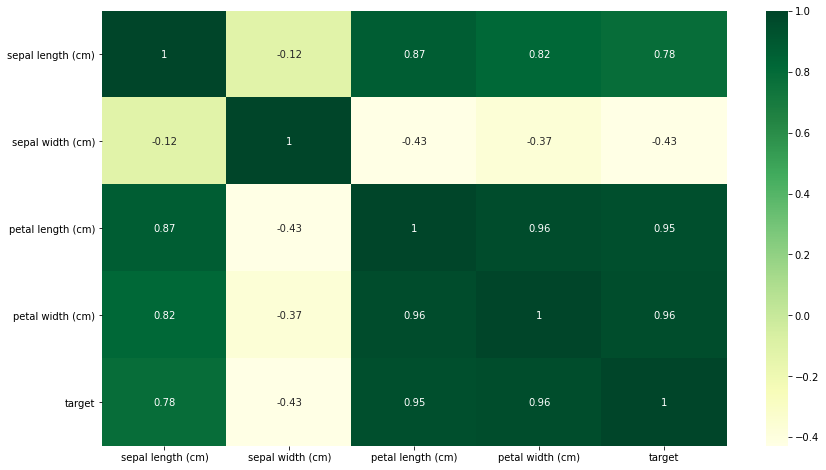

In [3]:
import matplotlib.pyplot as plt # matplotlib 做圖套件
import seaborn as sns #附著在plt的進階函示庫 ，做出更精美圖 


%matplotlib inline #python語法 ，有圖就show出來，不用 Plt.show()


plt.figure(figsize = (14, 8)) #設定圖寬、高  plt.figure(figsize = (寬, 高))


sns.heatmap(df.astype("float").corr(), cmap = "YlGn", annot=True)
#機器學習的資料都要用小數點，corr() = 相關係數矩陣，cmap = 圖的顏色選擇, annot參數顯示相關係數


#heatmap熱度圖 = 相關係數越高,顏色越深 

In [4]:
#有目標(target)，監督式（分類），data的每個特徵與target的相關性(Rrgreesion準、分類(運氣))

df.corr() #顯示dataframe裡的相關係數 , 跟自己的係數是1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [9]:
from sklearn.model_selection import train_test_split
#train _test_split 常用的交叉驗證函式，功能是從樣本中隨機的按比例選取train_data和test_data。 tuple(特徵 90%,特徵10%,目標90%,目標10%)

x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"],axis = 1),df["target"],test_size = 0.1)
'''
axis = 0 等於 drop掉一個橫列 , axis = 1 等於drop掉一個直行。 
df.drop後不改舊的直接回傳新的(會有2個df，回傳改過的df)， df原本的還在，直接copy一個改過的df回傳值。
df.drop["target"] = x座標(訓練)  
test_size (樣本佔比數) = 0.1 (有10%拿來做測試)
df["target"] y座標(0,1,2)  , x(四個係數)
'''


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)

#fit訓練指令
clf.fit(x_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

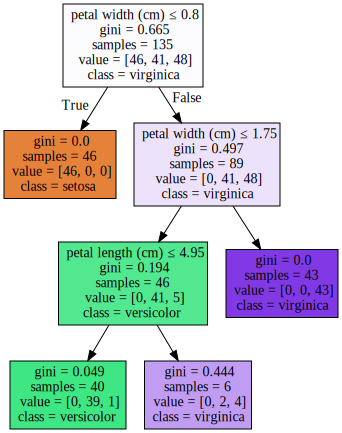

In [10]:
from sklearn.tree import export_graphviz
import graphviz #畫(決策樹)關係圖套件


#產生一個方格敘述
g = export_graphviz(clf, out_file = None, feature_names = iris["feature_names"],
                    class_names = iris["target_names"],filled = True ,#filled填入顏色 
                    special_characters=True) 


graph = graphviz.Source(g) #Source()將方格敘述轉換成圖
graph

In [12]:
#做預測結果
pre = clf.predict(x_test)
print("預測結果:",list(pre))
print("真正結果:", list(y_test))

#metrics衡量結果 
from sklearn.metrics import accuracy_score #準確率
print("預測成功機率:",accuracy_score(pre,y_test))

預測結果: [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0]
真正結果: [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0]
預測成功機率: 0.9333333333333333


In [14]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2
0,4,0,0
1,0,8,1
2,0,0,2
